<h1>HighBoost Filtering<h1>

Alunos:<br>
    Vitor Fernandes Gonçalves da Cruz Ra120116 <br> 
    Vitor Rodrigues Gôngora RA106769

<h2>Introdução<h2>

O presente trabalho tem como objetivo receber uma imagem de entrada e aplicar o método  HighBoost Filter através da linguagem de programação python, utilizando o método unsharping mask, no qual consite em subtrair a imagem suavizada da imagem original. O método pode ser descrito pelos seguintes pasoss:<br>
1. Blur da imagem original através do filtro da média.
2. Subtração a imagem suavizada da imagem original, no qual chamamos de g_mask.
3. Multiplicação de um escalar k com g_mask.
4. Soma da imagem original com o passo 3.

Para aplicar a suavização na imagem, precisa-se de um conceito chamado convolução, no qual é o processo de mover uma máscara, ou kernel, pela imagem e calcular a soma do produto ponto a ponto entre a imagem e a máscara rebatida. Uma máscara rebatida é basicamente uma inversão da máscara original, representada por g̅(x, y) = g(-x, -y). Para se ter o high boost filtering precisa-se que k>1

In [59]:
import numpy as np
import  cv2
import matplotlib.pyplot as plt

In [60]:
#Rebate a máscara
def inverse_mask(mask):
    mask = np.flipud(np.fliplr(mask))
    return mask

In [61]:
def average_filter(mask):
    total = np.sum(mask)
    result_mask = mask/total
    return result_mask

In [62]:
def create_mask(n):
    return np.ones((n,n))

In [63]:

def highBoost(image, image_blur, mask,k,input_user):
    mask_average_filter = average_filter(mask)

    #Faz a convolução 
    image_blur = cv2.filter2D(image,-1,mask_average_filter,borderType=cv2.BORDER_CONSTANT)

    g_mask = cv2.subtract(image,image_blur)
    mult = (k*g_mask).astype('uint8')
    image_result = cv2.add(image,mult)

    cv2.imwrite("Blur_Image_"+input_user,image_blur)
    cv2.imwrite("HighBoost_filter_"+input_user,image_result)

    # Criação da figura e dos subplots
    fig = plt.figure(figsize=(12, 4))

    # Primeiro subplot
    fig.add_subplot(1, 2, 1)
    plt.title('Blur Image')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(image_blur, cv2.COLOR_BGR2RGB))

    # Segundo subplot
    fig.add_subplot(1, 2, 2)
    plt.title('HighBoost Filter k='+str(k))
    plt.axis('off')
    plt.imshow(cv2.cvtColor(image_result, cv2.COLOR_BGR2RGB))

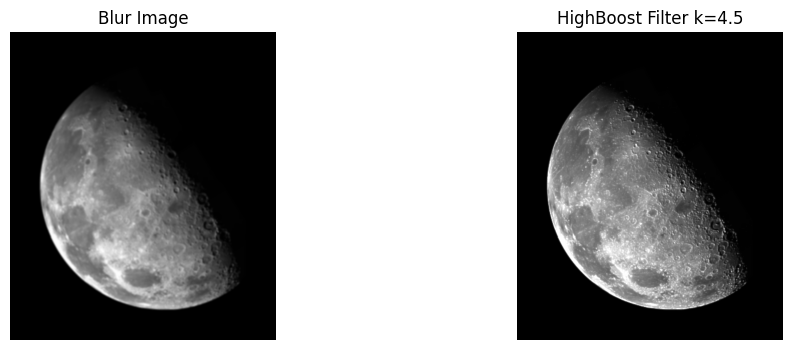

In [64]:
k  = 4.5
n = int(input('Entre com o tamanho da máscara:'))
mask = create_mask(n)
input_user = str(input('Entre com o nome da imagem'))
image  = cv2.imread(input_user)
image_blur = image.copy()
highBoost(image,image_blur,mask,k,input_user)

<h2>Referêcias<h2>

GONZALEZ, Rafael C.; WOODS, Richard E.. Processamento de Imagens Digitais. 3. ed. São Paulo: Pearson,2007